In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [5]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [6]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [8]:
# Calculate the percentage of null values in each column
null_percentage = df.isnull().mean() * 100

In [9]:
null_percentage

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalch      0.000000
exang       0.000000
oldpeak     6.828194
slope       0.000000
thal        0.000000
num         0.000000
dtype: float64

In [13]:
# Step 1: Calculate the mean of the column, excluding NaN values
mean_value = df['oldpeak'].mean()

In [14]:
# Step 2: Fill missing values with the mean
df['oldpeak'].fillna(mean_value, inplace=True)

In [15]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.500000,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.500000,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.891253,downsloping,fixed defect,4


In [16]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [17]:
# Checking for outliers using box plots
import seaborn as sns
import matplotlib.pyplot as plt


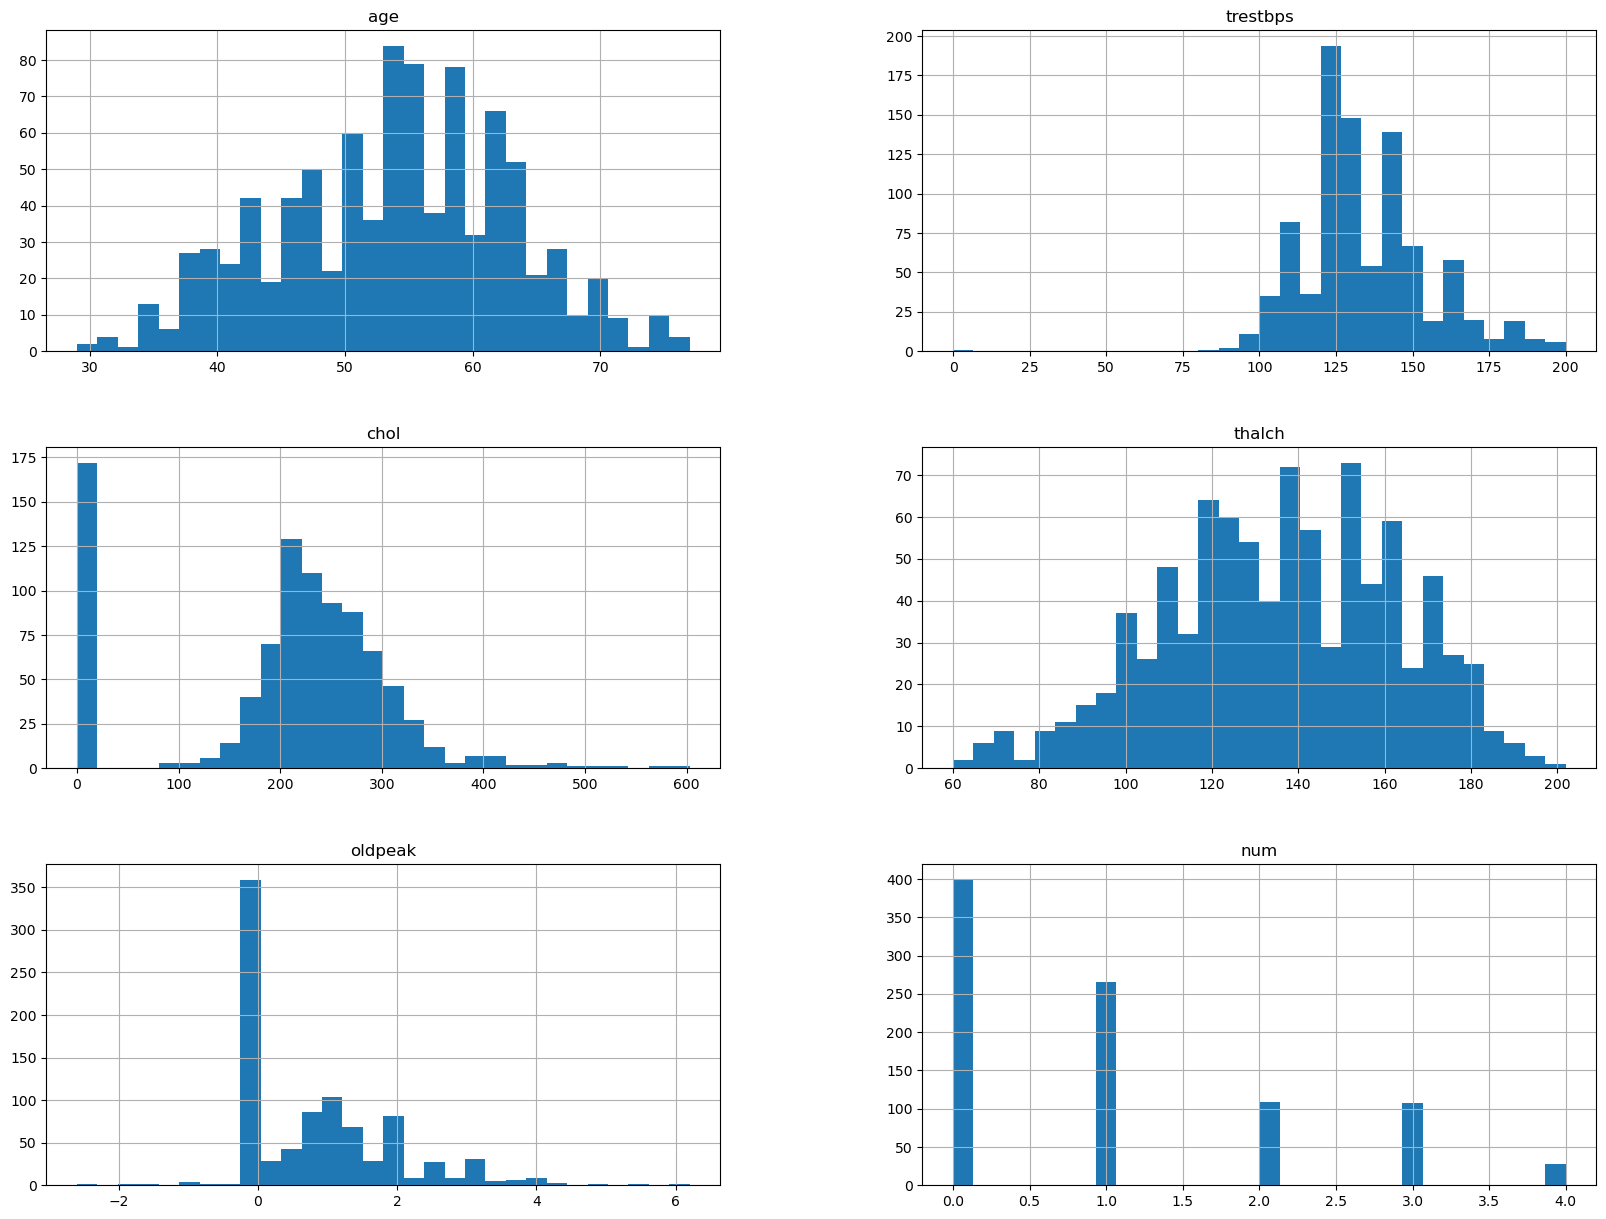

In [19]:
# Histograms
df.hist(bins=30, figsize=(20, 15))
plt.show()

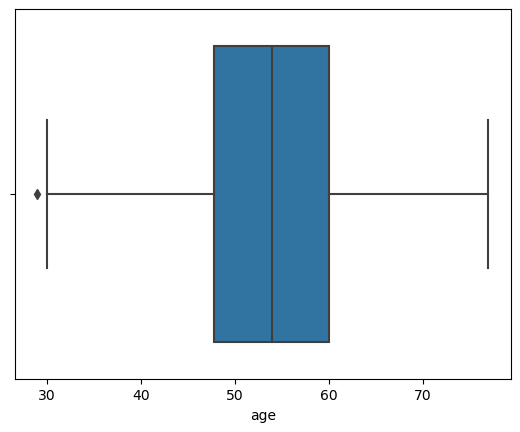

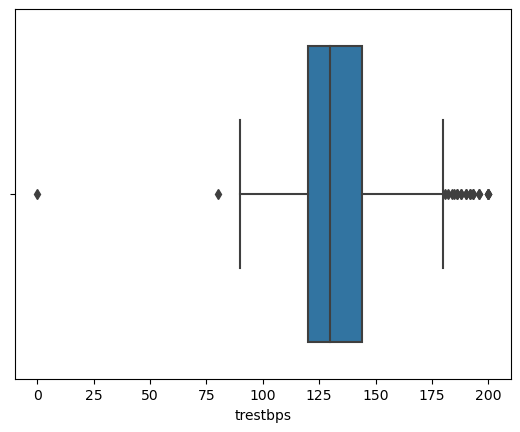

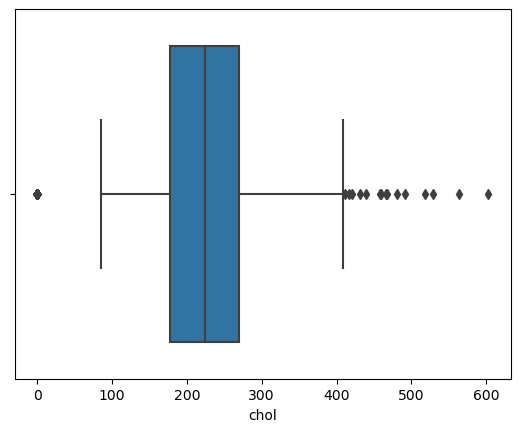

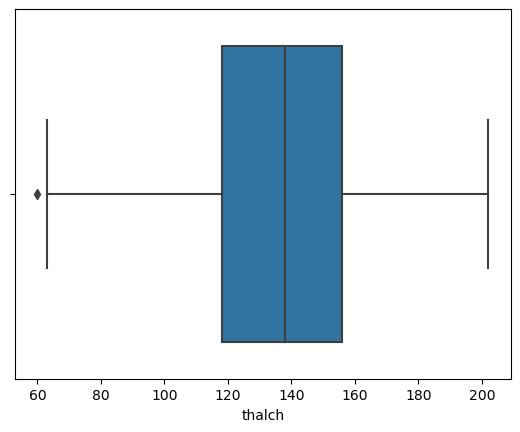

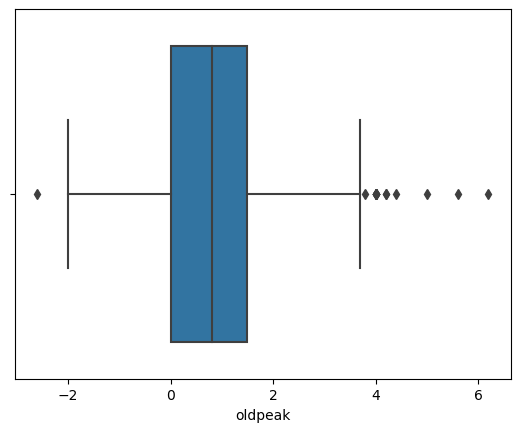

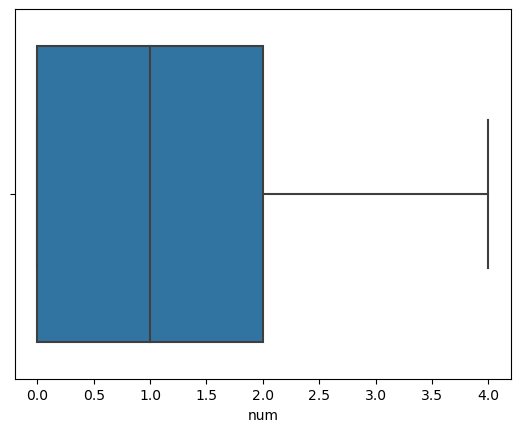

In [21]:
# Box plots for numerical features
for col in ['age','trestbps', 'chol', 'thalch', 'oldpeak','num']:
    sns.boxplot(x=df[col])
    plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder

In [25]:
# Convert boolean columns to strings
df['exang'] = df['exang'].astype(str)
df['fbs'] = df['fbs'].astype(str)

In [26]:
# Encode categorical columns
le = LabelEncoder()
categorical_columns = ['sex', 'cp', 'restecg', 'slope', 'thal','exang','fbs']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [27]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,1,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,1,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,1,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,3,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1,1.500000,2,2,4
904,62,1,0,166,170,0,2,120,3,3.000000,1,2,4
905,56,1,2,170,0,0,0,123,3,2.500000,0,1,4
906,56,1,2,144,208,1,2,105,2,0.891253,0,0,4


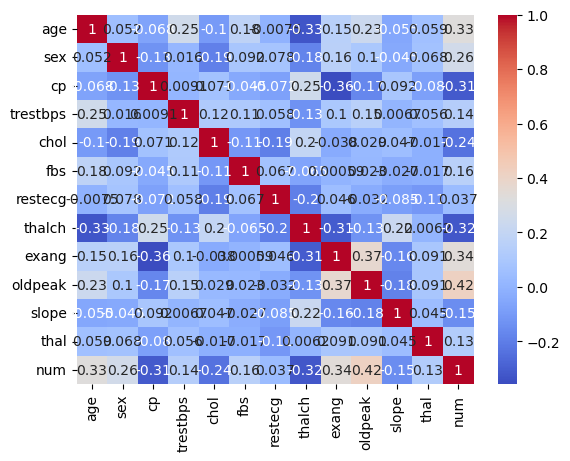

In [28]:
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [29]:
#Decision Tree Classification
from sklearn.model_selection import train_test_split

In [32]:
# Define features and target variable
X = df.drop('num', axis=1)  # 'num' is the target variable
y = df['num']

In [33]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,1,2.300000,0,0
1,41,1,1,135,203,0,1,132,1,0.000000,1,0
2,57,1,0,140,192,0,1,148,1,0.400000,1,0
3,52,1,3,118,186,0,0,190,1,0.000000,1,0
4,57,1,0,110,201,0,1,126,3,1.500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1,1.500000,2,2
904,62,1,0,166,170,0,2,120,3,3.000000,1,2
905,56,1,2,170,0,0,0,123,3,2.500000,0,1
906,56,1,2,144,208,1,2,105,2,0.891253,0,0


In [35]:
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

In [36]:
#Train the Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [37]:
# Initialize the model
model = DecisionTreeClassifier(random_state=42)

In [38]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
# Make predictions
y_pred = model.predict(X_test)

In [40]:
y_pred

array([1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 3, 1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1,
       1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 3, 0,
       2, 2, 1, 0, 0, 1, 2, 3, 0, 1, 0, 0, 3, 1, 1, 2, 0, 0, 3, 0, 0, 1,
       1, 1, 1, 1, 0, 3, 3, 3, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 2, 1, 3, 0, 0, 3, 2, 4, 0, 0, 0, 0, 0, 1, 3, 0, 2, 3, 1, 0, 1,
       0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 3, 0, 1, 0, 0, 0, 0, 1,
       2, 3, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0, 4,
       2, 1, 4, 2, 0, 0], dtype=int64)

In [42]:
y_prob = model.predict_proba(X_test) 

In [43]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [44]:
# Determine if it's a binary or multiclass classification
n_classes = len(set(y))

if n_classes == 2:
    # Binary classification
    roc_auc = roc_auc_score(y_test, y_prob[:, 1])
else:
    # Multiclass classification
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')


In [45]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.5439560439560439
Precision: 0.5321959405063801
Recall: 0.5439560439560439
F1 Score: 0.5379152248717465
ROC-AUC: 0.6115535228295725


In [46]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [47]:
# Initialize the Decision Tree model
dt = DecisionTreeClassifier()

In [48]:
# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [49]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [50]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [51]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.50687765706188


In [52]:
# Best model
best_model = grid_search.best_estimator_

In [53]:
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4)

In [54]:
# Predict on the test set
y_pred = best_model.predict(X_test)

In [55]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 3, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 1, 3, 1, 1, 3, 1, 0, 2, 0, 1, 1,
       2, 1, 2, 1, 0, 3, 3, 1, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0,
       2, 2, 1, 3, 1, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 1, 3,
       1, 2, 3, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3,
       2, 1, 0, 0, 2, 0], dtype=int64)

In [58]:
#Visualize the Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [59]:
# Convert feature names to a list
feature_names = X.columns.tolist()

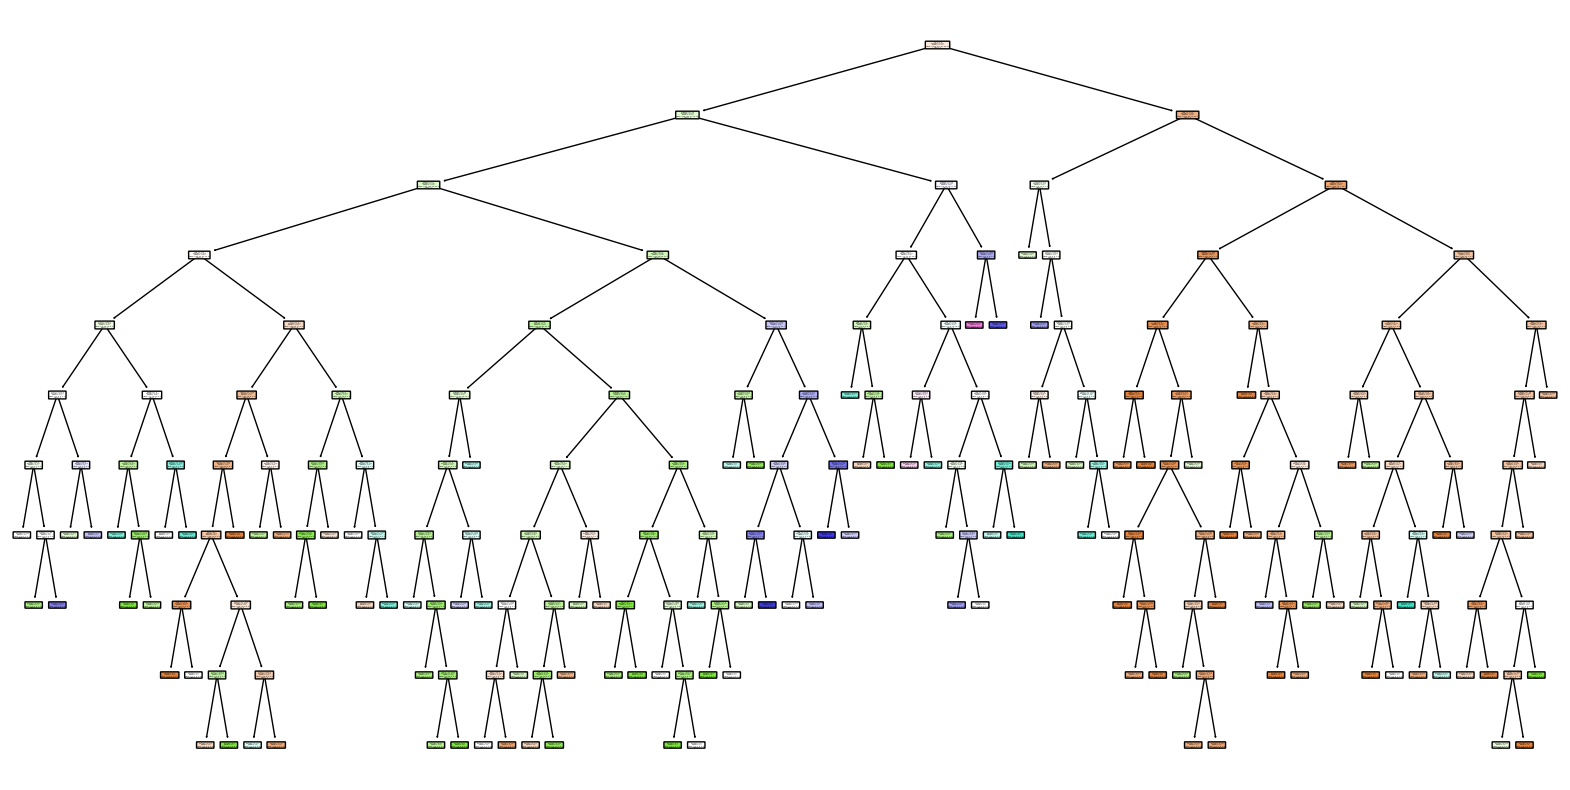

In [60]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=feature_names, class_names=[str(cls) for cls in set(y)], filled=True, rounded=True)
plt.show()

In [ ]:
1. Model Evaluation
Accuracy: 0.544
Interpretation: An accuracy of 54.4% indicates that the model is correctly classifying just over half of the instances. This is only marginally better than random guessing for a binary classification problem, where 50% accuracy would be expected by chance.
Precision: 0.532
Interpretation: Precision measures the proportion of true positive predictions among all positive predictions made by the model. A precision of 53.2% suggests that when the model predicts a positive class, it is correct about 53.2% of the time. This implies that there are a significant number of false positives.
Recall: 0.544
Interpretation: Recall (or sensitivity) measures the proportion of actual positives that are correctly identified by the model. A recall of 54.4% indicates that the model captures just over half of the actual positive cases, meaning there are many false negatives.
F1 Score: 0.538
Interpretation: The F1 score is the harmonic mean of precision and recall, providing a single metric that balances both false positives and false negatives. An F1 score of 53.8% reflects a trade-off between precision and recall, indicating that the model's performance is modest but not excellent.
ROC-AUC: 0.612
Interpretation: The ROC-AUC score measures the model’s ability to distinguish between classes. A score of 61.2% indicates that the model has some capability to differentiate between positive and negative cases, but there is substantial room for improvement.

2. Best Hyperparameters

Criterion: 'entropy'

Description: The criterion used for splitting nodes. 'Entropy' measures the information gain, aiming to increase the purity of the nodes.
Max Depth: 10

Description: The maximum depth of the tree. Limiting the depth can help prevent overfitting. A depth of 10 seems to be a good balance in your case.
Min Samples Leaf: 4

Description: The minimum number of samples required to be at a leaf node. Setting this to 4 helps in smoothing the model by ensuring that leaf nodes contain more than one sample.
Min Samples Split: 2

Description: The minimum number of samples required to split an internal node. A value of 2 allows the tree to grow deeper, potentially capturing more complexity in the data.
Best Score: 0.507

Interpretation: The best score achieved during hyperparameter tuning (0.507) suggests that the current model is only slightly better than random guessing. This is consistent with the accuracy and other metrics, highlighting the need for further improvements.

3. Recommendations for Improvement
Feature Engineering: Examine and improve feature selection and engineering. Adding new features or transforming existing ones may enhance model performance.

Data Quality: Ensure that the data is clean, with no missing or incorrect values. Feature scaling and normalization might also help.

Model Complexity: Experiment with different model complexities. Adjusting parameters like max_depth, min_samples_split, and min_samples_leaf could yield better performance.

Alternative Models: Consider trying other models such as Random Forests, Gradient Boosting, or Support Vector Machines. These models may perform better on your dataset.

Cross-Validation: Use cross-validation to get a more robust estimate of the model's performance and reduce variance in evaluation metrics.

Hyperparameter Tuning: Further tune hyperparameters using more advanced techniques or a larger search space to find better-performing settings.

In [ ]:
# Conclusion
Our Decision Tree model is a good starting point, but the performance metrics suggest there is significant room for improvement. 
By addressing feature engineering, data quality, model complexity, and considering alternative models,we can enhance the model’s performance.